## Projeto de Visualização de Dados:
# World Happiness Report

### Base de Dados: https://worldhappiness.report/
- Possui diversos critérios de felicidade para diversos países do mundo, entre o período de 2005 a 2021.

### Descrição dos Dados:
- **Nome do país**
- **Ano**
- **Life Ladder** 
    - Escala de 0-10, média da "escada" da vida, na opinião dos entrevistados
- **GDP per Capita** (em log)
- **Suporte Social**:
    - Média entre as respostas binárias "sim" ou "não" para "Se você estivesse com algum problema, teria parentes ou amigos para ajudá-la com o que necessitasse?"    
- **Expectativa de Vida** (em anos)
- **Liberdade de Escolhas na Vida** :
    - Média entre as respostas binárias "sim" ou "não" para “Você está satisfeito com a liberdade de escolher o que fazr com sua própria vida?”
- **Generosidade** 
    - Resíduo da regressão da resposta para "Você doou algum dinheiro para a caridade no último mês?" em relação ao GDP per capita
- **Percepção de Corrupção** 
    - Média entre as respostas binárias sobre as duas perguntas "A corrupção é generalizada no governo?" e "A corrupção é generalizada nas corporações e negócios?"
- **Afeto Positivo** 
    - Frequência média de felicidade, risadas e satisfação no dia anterior à pesquisa
- **Afeto Negativo** 
    - Frequência média de preocupação, tristeza e raiva no dia anterior à pesquisa

### Proposta:
* Criar uma série de visualizações da base de dados do World Happiness Report, de 2005 a 2021.
* Análise baseada em fatos geográficos e históricos.
* Impacto da Covid-19 nos diferentes países.

### Ferramentas: 
- Notebook Jupyter _(código)_
- Pandas _(dados)_
- **Plotly** _(visualizações)_


In [19]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")

import warnings
warnings.filterwarnings("ignore")

## Coletando a Base de Dados

In [8]:
whr = pd.read_csv("./WorldHappinessReport/world-happiness-report.csv")
whr21 = pd.read_csv("./WorldHappinessReport/world-happiness-report-2021.csv")

In [15]:
print(whr.shape)
whr.sample(10)

(1949, 11)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
240,Bulgaria,2016,4.838,9.928,0.926,66.40,0.700,-0.170,0.936,0.622,0.172
840,Jamaica,2011,5.374,9.164,0.855,66.22,0.796,-0.064,0.909,0.836,0.237
1118,Mexico,2016,6.824,9.884,0.893,67.70,0.752,-0.153,0.809,0.859,0.220
1459,Rwanda,2012,3.333,7.428,0.637,57.44,0.835,-0.012,0.081,0.703,0.132
1504,Serbia,2016,5.753,9.688,0.895,67.40,0.614,-0.068,0.890,0.535,0.298
1663,Syria,2009,4.979,8.654,0.842,64.00,0.748,0.082,0.688,0.574,0.292
813,Israel,2019,7.332,10.601,0.946,73.50,0.834,0.085,0.743,0.635,0.266
481,Dominican Republic,2019,6.004,9.821,0.884,66.10,0.877,-0.123,0.746,0.784,0.264
1000,Libya,2019,5.330,9.627,0.827,62.30,0.762,-0.073,0.686,0.709,0.401
1892,Venezuela,2019,5.081,NaN,0.888,66.70,0.626,NaN,0.839,0.761,0.351


In [49]:
print(whr21.shape)
whr21.sample(10)

(149, 21)


,Country name,Regional indicator,Life Ladder,Standard error of ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,year
60,Philippines,Southeast Asia,5.880,0.052,5.982,5.778,9.076,0.830,62.000,0.917,...,0.742,2.43,0.853,0.828,0.426,0.651,0.125,0.126,2.872,2021
30,Uruguay,Latin America and Caribbean,6.431,0.046,6.521,6.341,9.966,0.925,69.100,0.896,...,0.590,2.43,1.164,1.042,0.649,0.625,0.128,0.223,2.600,2021
142,Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.700,0.593,...,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060,2021
75,Russia,Commonwealth of Independent States,5.477,0.033,5.541,5.413,10.189,0.903,64.703,0.718,...,0.845,2.43,1.241,0.992,0.511,0.409,0.115,0.060,2.148,2021
98,Benin,Sub-Saharan Africa,5.045,0.073,5.189,4.901,8.087,0.489,54.713,0.757,...,0.661,2.43,0.507,0.058,0.196,0.457,0.166,0.178,3.482,2021
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,0.097,5.533,5.151,8.117,0.636,58.221,0.695,...,0.745,2.43,0.518,0.392,0.307,0.381,0.144,0.124,3.476,2021
121,Tunisia,Middle East and North Africa,4.596,0.058,4.709,4.484,9.266,0.691,67.201,0.656,...,0.870,2.43,0.919,0.515,0.590,0.334,0.057,0.044,2.138,2021
105,Morocco,Middle East and North Africa,4.918,0.060,5.036,4.800,8.903,0.560,66.208,0.774,...,0.801,2.43,0.792,0.219,0.558,0.477,0.034,0.088,2.749,2021
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,...,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124,2021
138,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,...,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405,2021


In [20]:
whr.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


## Pré-Processamento dos Dados

### Descrição:

Os dados de 2021 estão separados em uma base, que contém colunas a mais. O pré-processamento de dados será a criação de uma base mista dos dados de 2005-2020 e 2021 apenas com as colunas em comum, para a análise e visualização histórica completa.

No entanto, as **bases originais ainda serão utilizadas** por conterem dados interessantes.

### Colunas:

**Base 1:** World Happiness Report 2005-2020
    - Contry name
    - Year
    - Life Ladder
    - Log GDP per capita
    - Social Support
    - Healthy life expectancy at birth
    - Freedom to make life choices
    - Generosity
    - Perceptions of corruption
    - Positive Affect
    - Negative Affect
    
**Base 2:** World Happiness Report 2021
    - Contry name
    - Regional Indicator
    - Year
    - Ladder score (+ std error, upperwhisker, lower whisker)
    - Logged GDP per capita
    - Social Support
    - Healthy life expectancy
    - Freedom to make life choices
    - Generosity
    - Perceptions of corruption
    - Ladder score in Dystopia (+ explained by GDP, Social support, life expectancy, freedom, generosity, corruption)
    - Dystopia
    
**Base 3 (interseção das bases 1 e 2)**: WHR 2005-2021
    - Country name
    - Year
    - Ladder score
    - Logged GDP per capita
    - Social Support
    - Healthy life expectancy
    - Freedom to make life choices
    - Generosity
    - Perceptions of corruption

In [81]:
whr_combined = whr[['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].copy()
whr_combined.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [82]:
whr21 = whr21.rename(columns={'Ladder score': 'Life Ladder', 'Logged GDP per capita': 'Log GDP per capita', 'Healthy life expectancy': 'Healthy life expectancy at birth'})
whr21['year'] = [2021 for i in range(0,len(whr21))]

## Base de Dados Combinada Final (2005-2021)

In [83]:
aux = pd.concat([whr_combined, whr21], ignore_index=True)
whr_combined = aux[['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].copy()
whr_combined.sample(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
195,Bosnia and Herzegovina,2010,4.669,9.312,0.773,66.70,0.365,-0.128,0.933
672,Guinea,2019,4.768,7.849,0.655,55.50,0.691,0.097,0.756
539,Estonia,2018,6.091,10.472,0.933,68.60,0.886,-0.141,0.621
1657,Switzerland,2016,7.459,11.106,0.928,73.50,0.934,0.088,0.302
763,Iran,2008,5.129,9.489,0.633,63.14,0.601,0.052,0.868
1865,Uruguay,2020,6.310,9.937,0.921,69.20,0.908,-0.084,0.491
1274,Nigeria,2015,4.933,8.615,0.812,48.50,0.680,-0.035,0.926
317,Chad,2010,3.743,7.457,0.734,45.10,0.505,0.025,0.858
1278,Nigeria,2019,4.356,8.544,0.734,50.10,0.729,0.032,0.873
1153,Montenegro,2010,5.455,9.724,0.805,67.10,0.552,-0.206,0.757


## Análise Exploratória dos Dados

Com o pré-processamento completo, é possível obter algumas informações sobre os dados que serão trabalhados. A seguir, algumas análises visuais primárias sobre a base. 

## Generosidade: histograma

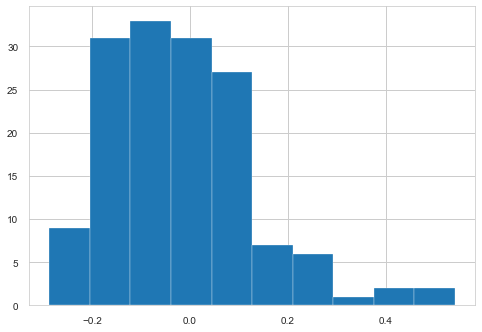

In [64]:
hist = whr21['Generosity'].hist(bins=10)

## Ano: histograma

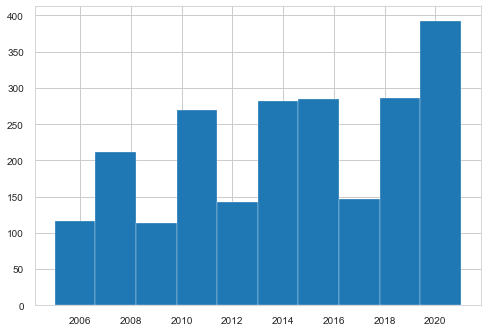

In [68]:
hist = whr_combined['year'].hist()

## Análise por país: Brasil

In [111]:
brazil = whr_combined.loc[whr_combined['Country name'] == 'Brazil']
brazil.sample(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
219,Brazil,2007,6.321,9.515,0.886,63.78,0.777,-0.016,0.728
226,Brazil,2014,6.981,9.664,0.898,65.54,0.714,-0.115,0.710
224,Brazil,2012,6.660,9.647,0.890,65.02,0.849,NaN,0.623
232,Brazil,2020,6.110,9.522,0.831,66.80,0.786,-0.053,0.729
221,Brazil,2009,7.001,9.544,0.913,64.26,0.767,-0.055,0.723


## Brasil: histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A01B18CA0>,
      dtype=object)

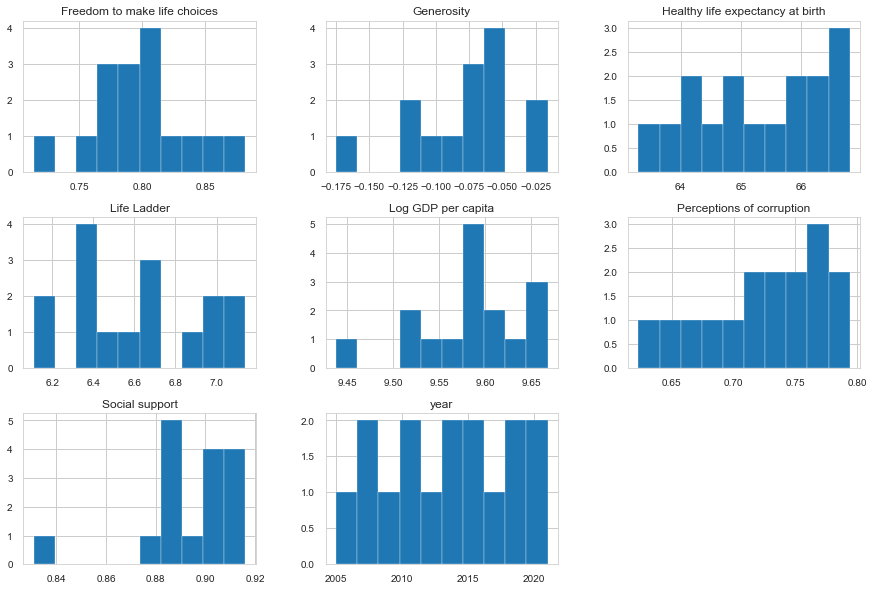

In [110]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
brazil.hist(ax = ax)

## Brasil: Life Ladder

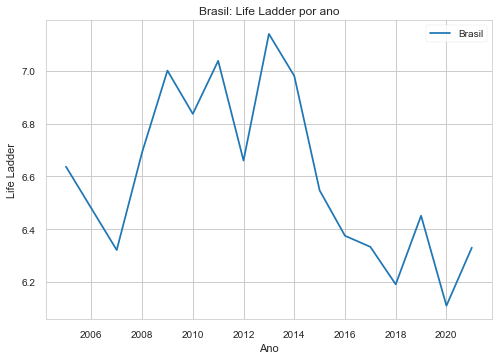

In [131]:
plt.plot(brazil['year'], brazil['Life Ladder'], label = "Brasil")

plt.xlabel('Ano')
plt.ylabel('Life Ladder')
plt.title('Brasil: Life Ladder por ano')
plt.legend()
plt.show()

## Brasil versus Alemanha: percepção de corrupção

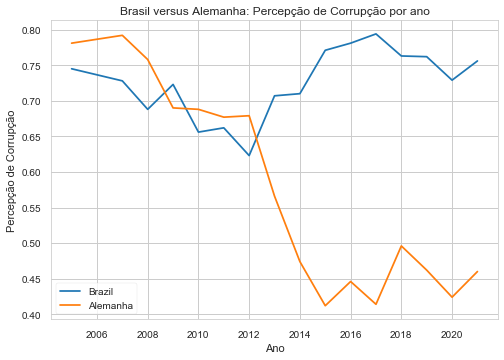

In [128]:
germany = whr_combined.loc[whr_combined['Country name'] == 'Germany']
plt.plot(brazil['year'], brazil['Perceptions of corruption'], label = "Brasil")

plt.plot(germany['year'], germany['Perceptions of corruption'], label = "Alemanha")
plt.xlabel('Ano')
plt.ylabel('Percepção de Corrupção')
plt.title('Brasil versus Alemanha: Percepção de Corrupção por ano')
plt.legend()
plt.show()

## Países mais Felizes e Mais Infelizes

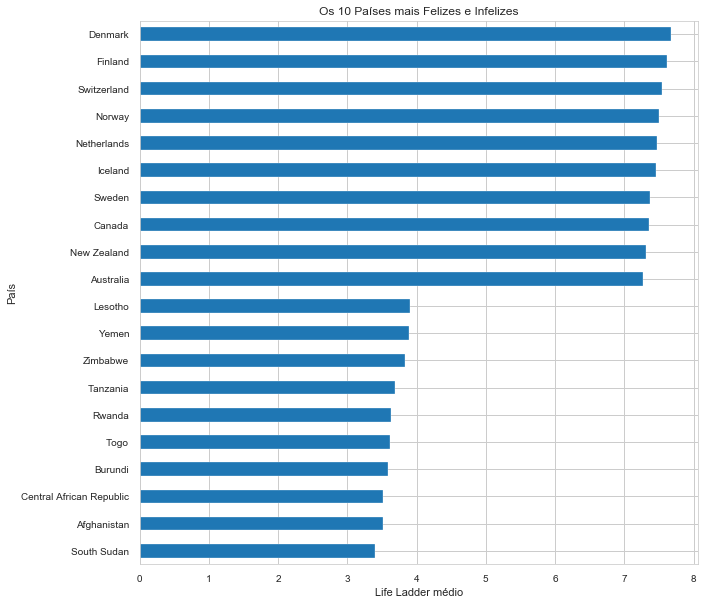

In [189]:
hap = whr_combined.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=False)[:10]
unhap = whr_combined.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=True)[:10]
top_bottom = hap.append(unhap, ignore_index=False).sort_values(ascending=True)

fig = plt.figure(figsize = (10, 10))
#hap.plot.barh()
#unhap.plot.barh()
fig = top_bottom.plot.barh()

plt.ylabel("País")
plt.xlabel("Life Ladder médio")
plt.title("Os 10 Países mais Felizes e Infelizes")
plt.show()

## Índice de Felicidade por País

In [51]:
fig = px.choropleth(whr_combined.sort_values("year"), 
                    locations = "Country name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                    animation_frame = "year")
fig.update_layout(title = "Life Ladder por País")
fig.show()

## Próximos Passos

- Desenvolver mais visualizações
- Correlacionar colunas (GDP versus life ladder, por exemplo)
- Possibilitar o usuário modificar e interagir com as visualizações 
    - Ex: modificar país, coluna ou ano visualizado
- Melhorar as visualizações utilizando os conhecimentos da disciplina
    - Utilizar cores, formatos, tamanhos nas visualizações 
- Análise do Impacto da Covid-9 (índices pré e pós início da pandemia)